In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import flask

In [4]:
!pip install flask-ngrok

In [5]:
from flask import Flask,render_template,request,flash
import os
from flask_ngrok import run_with_ngrok

In [6]:
app=Flask(__name__,template_folder='/', static_folder='/content/drive/MyDrive/image_cartoonifier/static')
run_with_ngrok(app)
app.config["SEND_FILE_MAX_AGE_DEFAULT"]=1

import cv2
import numpy as np 
import sys
import matplotlib.pyplot as plt
import os

@app.route('/')
def index():
  return render_template('/content/drive/MyDrive/image_cartoonifier/index.html')

@app.route('/next',methods=['POST','GET'])
def predict():
  file = request.files['img']
  file.save("/content/drive/MyDrive/image_cartoonifier/static/img.jpg")
  originalmage=cv2.imread("/content/drive/MyDrive/image_cartoonifier/static/img.jpg")
  originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
  ReSized1 = cv2.resize(originalmage, (1080,960))

  grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
  ReSized2 = cv2.resize(grayScaleImage, (1080,960)) 

  smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
  ReSized3 = cv2.resize(smoothGrayScale, (1080,960))

  getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
  ReSized4 = cv2.resize(getEdge, (1080,960))

  colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
  ReSized5 = cv2.resize(colorImage, (1080,960))
  cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
  img = cv2.resize(cartoonImage, (1080,960))

  plt.imshow(img)
  cv2.imwrite('/content/drive/MyDrive/image_cartoonifier/static/cartoon.jpg',cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

  return render_template("/content/drive/MyDrive/image_cartoonifier/predict.html")

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://a290e8bcb4e0.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [28/May/2021 17:11:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2021 17:11:09] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [28/May/2021 17:11:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2021 17:11:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2021 17:11:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2021 17:11:30] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [28/May/2021 17:11:56] "POST /next HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2021 17:11:56] "GET /static/cartoon.jpg HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2021 17:12:38] "POST /next HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2021 17:12:39] "GET /static/cartoon.jpg HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2021 17:13:36] "POST /next HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2021 17:13:37] "GET /static/cartoon.jpg HTTP/1.1" 200 -


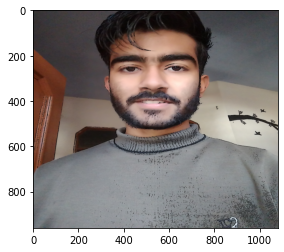

In [7]:
if __name__ == '__main__':
  app.run()

In [ ]:
c

NameError: ignored